# Value at Risk (VaR) - Historical Simulation

# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set time from to a certain number of years

In [ ]:
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

# Create a list of tickers

In [ ]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

# Download the daily adjusted close prices for the tickers

In [ ]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(tickers, start = startDate, end = endDate, auto_adjust = False)
    adj_close_df = data['Adj Close']

print(adj_close_df)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2010-06-11  52.296722  120.010002   39.725780   83.347916   42.759190
2010-06-14  52.309761  119.599998   39.717049   83.218758   42.766834
2010-06-15  52.218605  120.989998   40.782230   85.110954   43.729095
2010-06-16  52.342255  120.330002   40.948105   85.080566   43.683270
2010-06-17  52.485439  121.900002   41.079086   85.217339   43.759636
...               ...         ...         ...         ...         ...
2025-06-02  72.370003  311.670013  523.210022  592.710022  291.359985
2025-06-03  72.290001  308.910004  527.299988  596.090027  293.369995
2025-06-04  72.739998  310.899994  528.770020  595.929993  293.339996
2025-06-05  72.599998  309.329987  524.789978  593.049988  291.720001
2025-06-06  72.209999  305.179993  529.919983  599.140015  295.119995

[3771 rows x 5 columns]


# Calculate the daily log returns and drop any NAs

In [ ]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2010-06-14  0.000249 -0.003422 -0.000220 -0.001551  0.000179
2010-06-15 -0.001744  0.011555  0.026466  0.022483  0.022251
2010-06-16  0.002365 -0.005470  0.004059 -0.000357 -0.001049
2010-06-17  0.002732  0.012963  0.003194  0.001606  0.001747
2010-06-18 -0.000372  0.007600  0.000830  0.001084  0.000697
...              ...       ...       ...       ...       ...
2025-06-02 -0.002208  0.026234  0.007867  0.005617  0.005093
2025-06-03 -0.001106 -0.008895  0.007787  0.005686  0.006875
2025-06-04  0.006206  0.006421  0.002784 -0.000269 -0.000102
2025-06-05 -0.001927 -0.005063 -0.007555 -0.004845 -0.005538
2025-06-06 -0.005386 -0.013507  0.009728  0.010217  0.011588

[3770 rows x 5 columns]


# Create an equally weighted portfolio

In [ ]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


# Calculate the historical portfolio returns

In [ ]:
historical_returns = (log_returns * weights).sum(axis=1)
print(historical_returns)


Date
2010-06-14   -0.000953
2010-06-15    0.016202
2010-06-16   -0.000090
2010-06-17    0.004448
2010-06-18    0.001968
                ...   
2025-06-02    0.008520
2025-06-03    0.002069
2025-06-04    0.003008
2025-06-05   -0.004985
2025-06-06    0.002528
Length: 3770, dtype: float64


# Find the X-day historical returns

In [ ]:
days = 5

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2010-06-18    0.021575
2010-06-21    0.015513
2010-06-22   -0.006808
2010-06-23   -0.009279
2010-06-24   -0.023018
                ...   
2025-06-02    0.016836
2025-06-03    0.008548
2025-06-04    0.015680
2025-06-05    0.006973
2025-06-06    0.011140
Length: 3766, dtype: float64


# Specify a confidence interval and calculate the Value at Risk (VaR) using historical method

In [ ]:
confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

23966.618542096166


# Plot the results of the historical returns

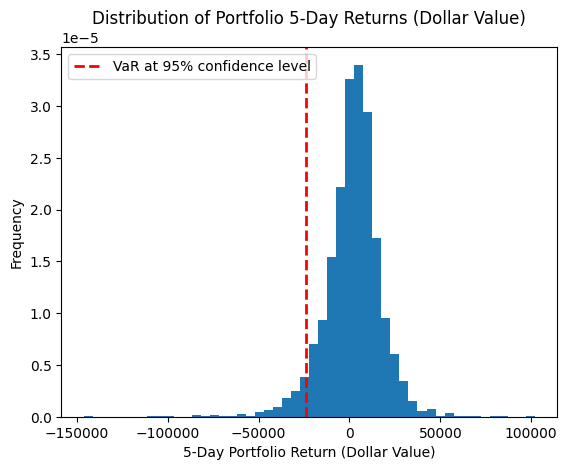

In [ ]:
return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()
